In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

In [16]:
df=pd.read_excel('3.이상치_처리.xlsx')

In [17]:
# Replacing '24:00' with '00:00' for correct datetime format
df['logTime'] = df['logTime'].replace({'24:00': '00:00'}, regex=True)
df['logTime'] = pd.to_datetime(df['logTime'], format='%Y/%m/%d %H:%M')

# Adding one day to dates that were originally '24:00'
mask = df['logTime'].dt.strftime('%H:%M') == '00:00'
df.loc[mask, 'logTime'] += timedelta(days=1)
df


,logTime,탁도,pH,수온,전기전도도,알칼리도,원수유입유량,정수지 탁도,응집지 pH,Co2 주입량(PV),침전수 탁도,PACS 투입량,PACS 투입률
0,2013-01-01 01:00:00,7.7017,7.6528,2.5044,314.8864,99.5002,2425.8030,0.0188,0.0000,0.0,0.0588,47.1580,19.440161
1,2013-01-01 02:00:00,7.2569,7.6505,2.4357,316.8224,99.5422,2423.7048,0.0190,0.0000,0.0,0.0304,46.6468,19.246073
2,2013-01-01 03:00:00,6.9190,7.6477,2.6493,318.1849,99.5546,2441.6343,0.0189,0.0000,0.0,0.0438,46.6316,19.098519
3,2013-01-01 04:00:00,6.9069,7.6480,2.3842,319.0541,99.5257,2442.0156,0.0189,0.0000,0.0,0.0926,46.9673,19.233006
4,2013-01-01 05:00:00,6.7461,7.6477,2.4758,320.2157,99.5107,2435.9121,0.0192,0.0000,0.0,0.0739,47.6310,19.553661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82348,2023-08-30 12:00:00,30.1667,6.8233,27.8489,167.2990,37.0192,1879.7292,0.0586,6.8634,0.0,0.7486,183.5250,97.633744
82349,2023-08-30 14:00:00,30.3615,6.8087,27.7631,166.6615,37.2736,1874.3229,0.0584,6.8585,0.0,0.8000,182.2000,97.208437
82350,2023-08-30 15:00:00,30.2833,6.7794,27.6840,165.5698,37.9352,1868.2188,0.0584,6.8657,0.0,0.7943,184.0750,98.529680
82351,2023-08-30 20:00:00,30.8281,6.6617,27.5372,158.5146,40.6888,1794.8958,0.0589,6.8617,0.0,0.7872,157.9750,88.013466


In [18]:
fin_df=df[['logTime','탁도']]
fin_df

,logTime,탁도
0,2013-01-01 01:00:00,7.7017
1,2013-01-01 02:00:00,7.2569
2,2013-01-01 03:00:00,6.9190
3,2013-01-01 04:00:00,6.9069
4,2013-01-01 05:00:00,6.7461
...,...,...
82348,2023-08-30 12:00:00,30.1667
82349,2023-08-30 14:00:00,30.3615
82350,2023-08-30 15:00:00,30.2833
82351,2023-08-30 20:00:00,30.8281


In [19]:
# # 시간을 shift 하여 데이터 변동확인
# fin_df['t-1 탁도']=fin_df['탁도'].shift(-1)

# # low-pass filter를 적용하지 않은 데이터 
# plt.scatter(fin_df['t-1 탁도'],fin_df['탁도'])
# plt.title('탁도')
# plt.xlabel('t 탁도')
# plt.ylabel('t+1 탁도')
# plt.show()

In [20]:
# 푸리에 변환

cutoff = {'탁도' : 0.1}
cols = ['탁도']
for col in cols:
    
    frequencies = np.fft.fftfreq(len(fin_df[col]))
    fft_values = np.fft.fft(fin_df[col])

    # 컷오프 주파수 설정 및 필터 적용
    cutoff_frequency = cutoff.get(col, 0.1)
    fft_values[np.abs(frequencies) > cutoff_frequency] = 0

    # 역 푸리에 변환
    low_val = np.fft.ifft(fft_values).real
    fin_df[col] = low_val

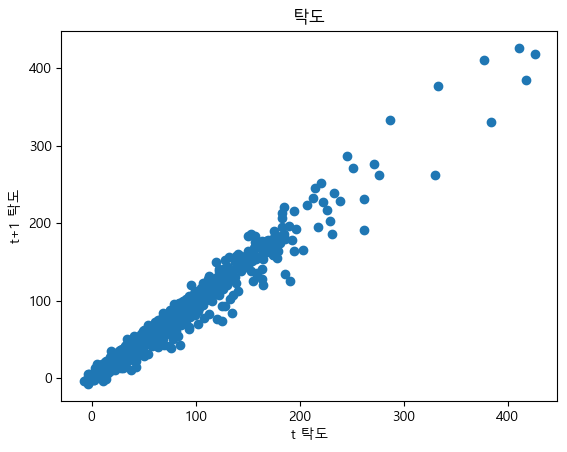

In [21]:
# 시간을 shift 하여 데이터 변동확인
fin_df['t-1 탁도']=fin_df['탁도'].shift(-1)

# low-pass filter를 적용한 데이터
plt.scatter(fin_df['t-1 탁도'],fin_df['탁도'])
plt.title('탁도')
plt.xlabel('t 탁도')
plt.ylabel('t+1 탁도')
plt.show()

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
No weights found for full model, training model from scratch
Epoch 1/100
2574/2574 [==============================] - 21s 7ms/step - loss: 1.5107e-04
Epoch 2/100
2574/2574 [==============================] - 19s 7ms/step - loss: 8.2425e-05
Epoch 3/100
2574/2574 [==============================] - 20s 8ms/step - loss: 3.0262e-05
Epoch 4/100
2574/2574 [==============================] - 19s 8ms/step - loss: 9.6935e-06
Epoch 5/100
2574/2574 [==============================] - 19s 8ms/step - loss: 1.7775e-05
Epoch 6/100
2574/2574 [==============================] - 19s 7ms/step - loss: 2.3706e-05
Epoch 7/100
2574/2574 [==============================] - 19s 7ms/step - loss: 1.5578e-05
Epoch 7: early stopping


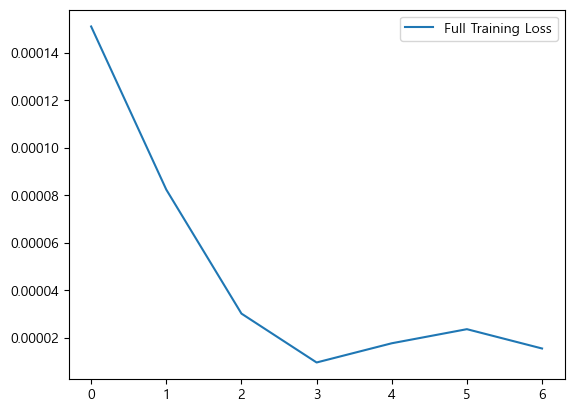

1/1 [==============================] - 1s 528ms/step
Predicted 탁도 for the next time step: 106.20773315429688


In [25]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# save original 'Open' prices for later
original_ntu = fin_df['탁도'].values

# separate dates for future plotting
dates = pd.to_datetime(fin_df['logTime'])

# variables for training
cols = list(fin_df)[1:2]

# new dataframe with only training data - 5 columns
stock_data = fin_df[cols].astype(float)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
# fit and transform the data
stock_data_scaled = scaler.fit_transform(stock_data) 

# data reformatting for LSTM
pred_days = 1  # prediction period
seq_len =  3  # sequence length = past days for future prediction.
input_dim = 1  # input_dimension]

fullX = []
fullY = []

# Data preparation for entire dataset
for i in range(seq_len, len(stock_data_scaled)-pred_days +1):
    fullX.append(stock_data_scaled[i - seq_len:i, 0:stock_data_scaled.shape[1]])
    fullY.append(stock_data_scaled[i + pred_days - 1:i + pred_days, 0])

fullX, fullY = np.array(fullX), np.array(fullY)

# LSTM model for the entire dataset
model_full = Sequential()
model_full.add(LSTM(32, input_shape=(fullX.shape[1], fullX.shape[2]), 
               return_sequences=True))
model_full.add(LSTM(64, return_sequences=True))
model_full.add(LSTM(32, return_sequences=False))
model_full.add(Dense(fullY.shape[1]))

# Specify your learning rate
learning_rate_full = 0.01
# Create an Adam optimizer with the specified learning rate
optimizer_full = Adam(learning_rate=learning_rate_full)
# Compile your model using the custom optimizer
model_full.compile(optimizer=optimizer_full, loss='mse')

save_dir = './save_weights/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
early_stopping = EarlyStopping(monitor='loss', patience=3, mode='min', verbose=1, restore_best_weights=True)
# Try to load weights for full data model
try:
    model_full.load_weights('./save_weights/lstm_weights_full.h5')
    print("Loaded full model weights from disk")
except:
    print("No weights found for full model, training model from scratch")
    # Fit the model
    history_full = model_full.fit(fullX, fullY, epochs=100, batch_size=32, verbose=1,callbacks=[early_stopping])
    # Save model weights after training
    model_full.save_weights('./save_weights/lstm_weights_full.h5')

    # Plotting loss for full training
    plt.plot(history_full.history['loss'], label='Full Training loss')
    plt.legend()
    plt.show()

